In [86]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import numpy as np
import matplotlib.pyplot as plt
import potentials
import neighbors
from opinions import OpinionModel
import time
start = time.clock()

In [87]:
models = []
num_models = 20
#potential_values = np.linspace(0, 1, num_models)
for i in range(num_models):
    nsteps=200
    nagents=20
    #P = []
    #for i in range(nagents):
    #    arr = []
    #    for j in range(nagents):
    #        arr.append(-1)
    #    P.append(arr)
    neighbs = neighbors.totally_connected(nagents, self_connected=True)
    #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
    linspaced = np.linspace(0, 1, nagents).tolist()
    opinions = [[i] for i in linspaced]
    #opinions = #[[np.random.rand()] for i in range(nagents)]
    #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
    pots = [potentials.tent(.63) for i in range(nagents)]
    coupling = [[1]]
    model = OpinionModel(nagents, neighbs, opinions, pots, coupling, 'pairwise')
    models.append(model)

In [ ]:
import cProfile
def fn():
    for model in models:
        model.ALPHA = .01
        model.run(nsteps)
cProfile.run('fn()')

In [76]:
agent_opinions = []
for model in models:
    agent_opinion = model.datacollector.get_agent_vars_dataframe()
    agent_opinions.append(agent_opinion)

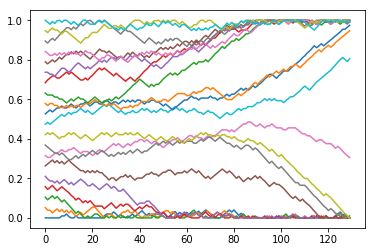

In [77]:
x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
plt.plot(x)

In [78]:
from analysis import opinions_clusters
from analysis import num_clusters
sum = 0
for i in range(num_models):
    for j in range(len(opinions[0])):
        print("Model %d Opinion %d:" % (i, j))
        print(num_clusters(models[i], .4)[j])
        sum += num_clusters(models[i], .4)[j]

print(sum)
print("average: %f" %(float(sum) / float(num_models)))
#len(opinions_clusters(models[0])[0])

Model 0 Opinion 0:
2
Model 1 Opinion 0:
1
Model 2 Opinion 0:
2
Model 3 Opinion 0:
1
Model 4 Opinion 0:
1
Model 5 Opinion 0:
1
Model 6 Opinion 0:
2
Model 7 Opinion 0:
2
Model 8 Opinion 0:
2
Model 9 Opinion 0:
2
Model 10 Opinion 0:
1
Model 11 Opinion 0:
2
Model 12 Opinion 0:
2
Model 13 Opinion 0:
2
Model 14 Opinion 0:
1
Model 15 Opinion 0:
1
Model 16 Opinion 0:
1
Model 17 Opinion 0:
1
Model 18 Opinion 0:
2
Model 19 Opinion 0:
2
Model 20 Opinion 0:
1
Model 21 Opinion 0:
1
Model 22 Opinion 0:
1
Model 23 Opinion 0:
2
Model 24 Opinion 0:
1
Model 25 Opinion 0:
1
Model 26 Opinion 0:
2
Model 27 Opinion 0:
2
Model 28 Opinion 0:
1
Model 29 Opinion 0:
2
Model 30 Opinion 0:
2
Model 31 Opinion 0:
1
Model 32 Opinion 0:
1
Model 33 Opinion 0:
2
Model 34 Opinion 0:
1
Model 35 Opinion 0:
1
Model 36 Opinion 0:
2
Model 37 Opinion 0:
1
Model 38 Opinion 0:
2
Model 39 Opinion 0:
1
Model 40 Opinion 0:
2
Model 41 Opinion 0:
1
Model 42 Opinion 0:
2
Model 43 Opinion 0:
2
Model 44 Opinion 0:
1
Model 45 Opinion 0:


In [72]:
print("Time taken (.seconds): ")
print(time.clock() - start)

Time taken (.seconds): 
23.518944000000005


In [48]:
num_models
linspaced = np.linspace(0, 1, nagents).tolist()
linspaced

[0.0,
 0.05263157894736842,
 0.10526315789473684,
 0.15789473684210525,
 0.21052631578947367,
 0.2631578947368421,
 0.3157894736842105,
 0.3684210526315789,
 0.42105263157894735,
 0.47368421052631576,
 0.5263157894736842,
 0.5789473684210527,
 0.631578947368421,
 0.6842105263157894,
 0.7368421052631579,
 0.7894736842105263,
 0.8421052631578947,
 0.894736842105263,
 0.9473684210526315,
 1.0]

In [82]:
tau = .4
while tau < .7:
    models = []
    num_models = 50
    #potential_values = np.linspace(0, 1, num_models)
    for i in range(num_models):
        nsteps=180
        nagents=20
        #P = []
        #for i in range(nagents):
        #    arr = []
        #    for j in range(nagents):
        #        arr.append(-1)
        #    P.append(arr)
        neighbs = neighbors.totally_connected(nagents, self_connected=True)
        #neighbors = degree_connected(nagents, 1) #the second parameter ranges from 0 to 1, generates graphs of varying degrees of connectedness.
        linspaced = np.linspace(0, 1, nagents).tolist()
        opinions = [[i] for i in linspaced]
        #opinions = #[[np.random.rand()] for i in range(nagents)]
        #Also try potentials.tent(.5), potentials.tent(.3, .7), potentials.gaussian(), potentials.simple()...
        pots = [potentials.tent(tau) for i in range(nagents)]
        coupling = [[1]]
        model = OpinionModel(nagents, neighbs, opinions, pots, coupling, 'pairwise')
        models.append(model)
    for model in models:
        model.ALPHA = .01
        model.run(nsteps)
    agent_opinions = []
    for model in models:
        agent_opinion = model.datacollector.get_agent_vars_dataframe()
        agent_opinions.append(agent_opinion)
    #x=agent_opinions[0].Opinion0.as_matrix().reshape((nsteps, nagents))
    #plt.plot(x)
    from analysis import opinions_clusters
    from analysis import num_clusters
    sum = 0
    for i in range(num_models):
        for j in range(len(opinions[0])):
            #print("Model %d Opinion %d:" % (i, j))
            #print(num_clusters(models[i], .4)[j])
            sum += num_clusters(models[i], .4)[j]

    print(sum)
    print("average: %f for tau: %f" %(float(sum) / float(num_models), tau))
    tau += .04

100
average: 2.000000 for tau: 0.400000
100
average: 2.000000 for tau: 0.440000
100
average: 2.000000 for tau: 0.480000
98
average: 1.960000 for tau: 0.520000
96
average: 1.920000 for tau: 0.560000
83
average: 1.660000 for tau: 0.600000
74
average: 1.480000 for tau: 0.640000
60
average: 1.200000 for tau: 0.680000
